# Memory Maze Environment Exploration

This notebook contains basic kernels for exploring and experimenting with the Memory Maze environment.

## Environment Overview
Memory Maze is a 3D maze environment designed for evaluating long-term memory abilities of RL agents. The agent needs to:
- Navigate through a randomized maze
- Find target objects of specific colors
- Remember object positions and maze layout
- Collect rewards by touching the correct target objects

## Available Maze Sizes
- **9x9**: 3 objects, 1000 steps (easiest)
- **11x11**: 4 objects, 2000 steps  
- **13x13**: 5 objects, 3000 steps
- **15x15**: 6 objects, 4000 steps (hardest)

In [1]:
# Environment Setup and Rendering Backend
# Fix for missing EGL package - use glfw instead
import os
os.environ['MUJOCO_GL'] = 'glfw'  # Use windowed rendering instead of EGL

# Alternative options (uncomment one if needed):
# os.environ['MUJOCO_GL'] = 'osmesa'  # Software rendering (slow but reliable)
# os.environ['MUJOCO_GL'] = 'egl'     # Headless GPU rendering (requires EGL)

# Install required packages if not already installed
try:
    import gymnasium as gym
except ImportError:
    print("Installing gymnasium...")
    %pip install gymnasium
    
try:
    import matplotlib.pyplot as plt
except ImportError:
    print("Installing matplotlib...")
    %pip install matplotlib

# Core imports
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
import time

# Memory Maze imports - let's debug the registration
print("Importing memory_maze...")
try:
    import memory_maze
    print("✅ memory_maze imported successfully")
except Exception as e:
    print(f"❌ Error importing memory_maze: {e}")

try:
    from memory_maze import tasks
    print("✅ tasks imported successfully")
except Exception as e:
    print(f"❌ Error importing tasks: {e}")

print(f"Using rendering backend: {os.environ.get('MUJOCO_GL', 'default')}")

# Check if environments are registered
print(f"Total registered environments: {len(gym.registry)}")
print("Looking for Memory Maze environments...")
env_count = 0
for env_id, env_spec in gym.registry.items():
    if 'memory_maze' in env_id.lower():
        print(f"  - {env_id}")
        env_count += 1

if env_count == 0:
    print("❌ No Memory Maze environments found!")
    print("Let's try direct environment creation...")
    try:
        # Try creating environment directly
        env = gym.make('memory_maze:MemoryMaze-9x9-v0')
        print("✅ Direct environment creation successful!")
    except Exception as e:
        print(f"❌ Direct creation failed: {e}")
        print("Trying alternative approach...")
        try:
            # Use tasks directly
            env = tasks.memory_maze_9x9()
            print("✅ Direct task creation successful!")
        except Exception as e2:
            print(f"❌ Task creation failed: {e2}")

Importing memory_maze...
✅ memory_maze imported successfully
✅ tasks imported successfully
Using rendering backend: glfw
Total registered environments: 115
Looking for Memory Maze environments...
❌ No Memory Maze environments found!
Let's try direct environment creation...
✅ Direct environment creation successful!


Creating Memory Maze 9x9 environment...
✅ Environment created successfully!
Environment ID: MemoryMaze-9x9-v0
Action Space: Discrete(6)
Observation Space: Box(0, 255, (64, 64, 3), uint8)
Max Episode Steps: None



Initial observation shape: (64, 64, 3)
Observation dtype: uint8


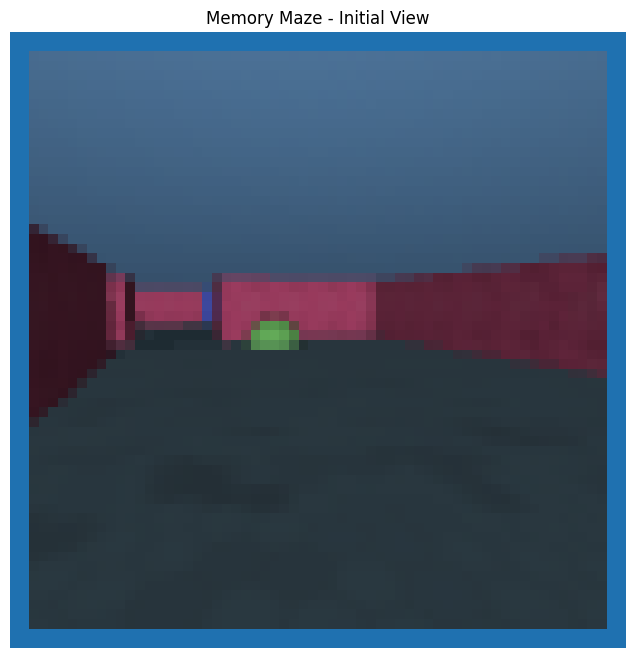

🎯 Look at the border color - that's your target!
📍 Navigate through the maze to find an object of that color


In [2]:
# Create and Visualize Environment

# Create the environment directly
print("Creating Memory Maze 9x9 environment...")
env = gym.make('memory_maze:MemoryMaze-9x9-v0')

print(f"✅ Environment created successfully!")
print(f"Environment ID: {env.spec.id}")
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {env.spec.max_episode_steps}")

# Reset environment to get initial observation
obs, info = env.reset()
print(f"\nInitial observation shape: {obs.shape}")
print(f"Observation dtype: {obs.dtype}")

# Visualize the observation
plt.figure(figsize=(8, 8))
plt.imshow(obs)
plt.title("Memory Maze - Initial View")
plt.axis('off')
plt.show()

print("🎯 Look at the border color - that's your target!")
print("📍 Navigate through the maze to find an object of that color")

Creating environment with top-down camera for better visualization...


Top-down observation shape: (256, 256, 3)


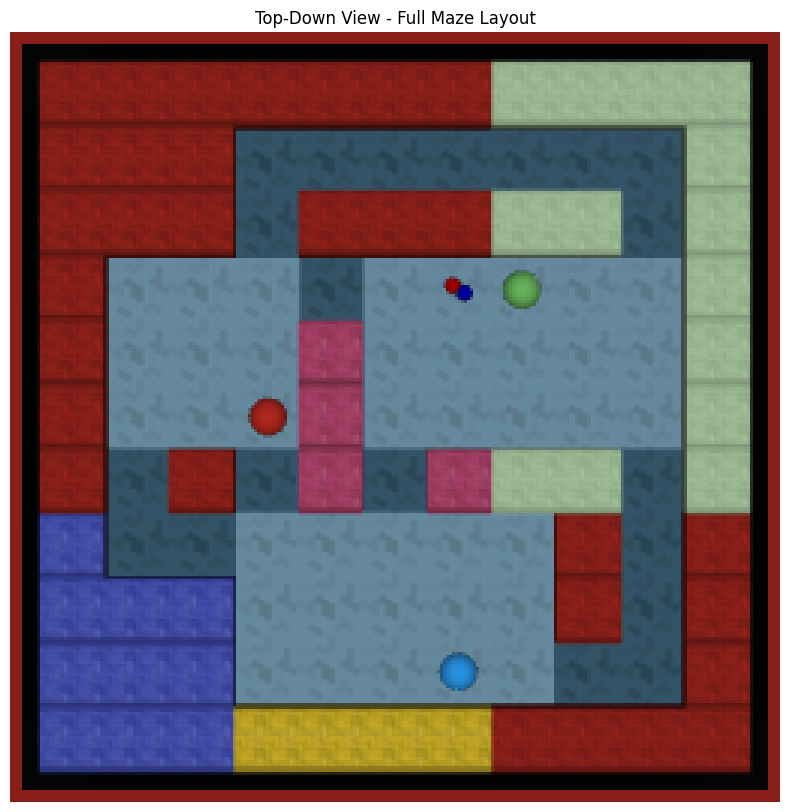

🔍 This view shows the complete maze layout!
🎯 The colored circles are the target objects
📍 Find the object matching the border color in the first-person view


In [3]:
# Top-Down Camera View
print("Creating environment with top-down camera for better visualization...")
env_top = gym.make('memory_maze:MemoryMaze-9x9-Top-v0')

obs_top, info = env_top.reset()
print(f"Top-down observation shape: {obs_top.shape}")

# Display top-down view
plt.figure(figsize=(10, 10))
plt.imshow(obs_top)
plt.title("Top-Down View - Full Maze Layout")
plt.axis('off')
plt.show()

print("🔍 This view shows the complete maze layout!")
print("🎯 The colored circles are the target objects")
print("📍 Find the object matching the border color in the first-person view")

🎬 Creating agent wander GIF with 50 steps...
📍 Agent will wander randomly through the maze


Generating frames:   0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/bt/rngwf7wj73x2zfr_7chtd0jh0000gn/T/ipykernel_39832/226202121.py:71: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread('/tmp/temp_frame.png')
/var/folders/bt/rngwf7wj73x2zfr_7chtd0jh0000gn/T/ipykernel_39832/226202121.py:71: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread('/tmp/temp_frame.png')
/var/folders/bt/rngwf7wj73x2zfr_7chtd0jh0000gn/T/ipykernel_39832/226202121.py:71: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this war

🎥 Creating GIF with 50 frames...
✅ GIF saved as 'memory_maze_wander.gif'
📊 Total reward: 0.0
🎯 Episode completed in 50 steps


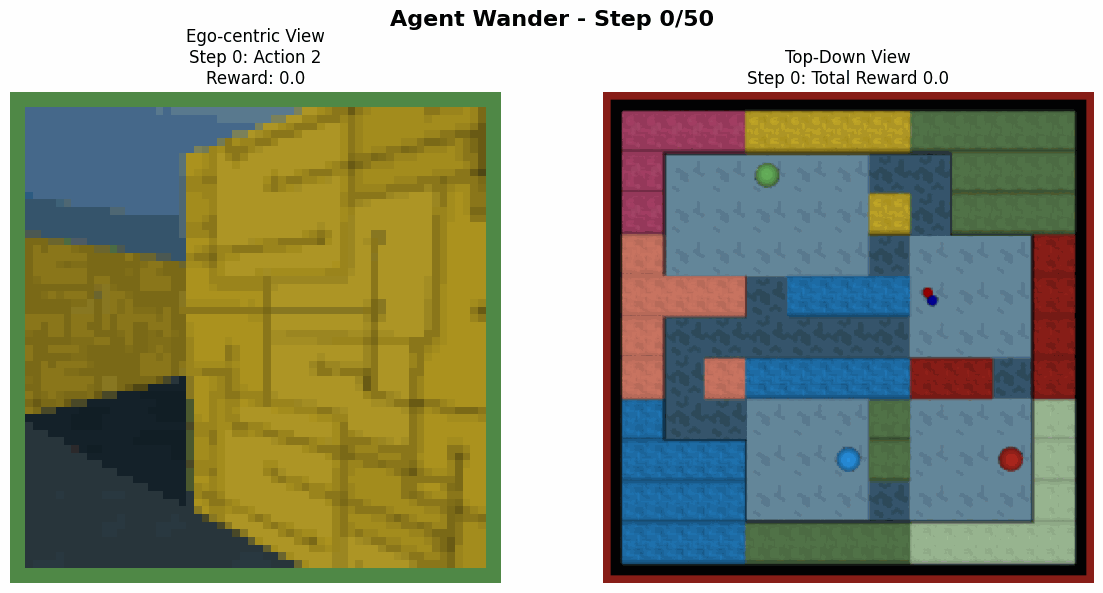

In [4]:
# Side-by-Side Agent Wander Visualization (GIF)
# Note: the two environment are not the same, map is different
import imageio
import numpy as np
from tqdm.notebook import tqdm

def create_agent_wander_gif(steps=100, output_filename="agent_wander.gif"):
    """Create a GIF showing agent wandering with ego-centric and top-down views side by side"""
    
    # Create both environments
    env_ego = gym.make('memory_maze:MemoryMaze-9x9-v0')
    env_top = gym.make('memory_maze:MemoryMaze-9x9-Top-v0')
    
    # Reset both environments with same seed for consistency
    obs_ego, info_ego = env_ego.reset(seed=42)
    obs_top, info_top = env_top.reset(seed=42)
    
    frames = []
    total_reward = 0
    
    print(f"🎬 Creating agent wander GIF with {steps} steps...")
    print("📍 Agent will wander randomly through the maze")
    
    # Simple wandering strategy
    action_sequence = []
    for i in range(steps):
        # Create a more interesting wandering pattern
        if i % 10 == 0:
            # Change direction occasionally
            action = np.random.choice([2, 3])  # Turn left or right
        elif i % 15 == 0:
            # Sometimes turn while moving
            action = np.random.choice([4, 5])  # Forward+left or forward+right
        else:
            # Usually move forward
            action = np.random.choice([1, 1, 1, 0])  # Forward (biased) or noop
        
        action_sequence.append(action)
    
    for step in tqdm(range(steps), desc="Generating frames"):
        action = action_sequence[step]
        
        # Step both environments
        obs_ego, reward, terminated, truncated, info_ego = env_ego.step(action)
        obs_top, _, _, _, _ = env_top.step(action)  # Top-down doesn't give rewards
        
        total_reward += reward
        
        # Create side-by-side visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        
        # Ego-centric view
        ax1.imshow(obs_ego)
        ax1.set_title(f'Ego-centric View\nStep {step}: Action {action}\nReward: {reward:.1f}')
        ax1.axis('off')
        
        # Top-down view
        ax2.imshow(obs_top)
        ax2.set_title(f'Top-Down View\nStep {step}: Total Reward {total_reward:.1f}')
        ax2.axis('off')
        
        # Add step counter
        fig.suptitle(f'Agent Wander - Step {step}/{steps}', fontsize=16, fontweight='bold')
        
        # Save frame
        plt.tight_layout()
        plt.savefig('/tmp/temp_frame.png', dpi=100, bbox_inches='tight')
        plt.close()
        
        # Read and store frame
        frame = imageio.imread('/tmp/temp_frame.png')
        frames.append(frame)
        
        if terminated or truncated:
            print(f"Episode finished early at step {step}")
            break
    
    # Create GIF
    print(f"🎥 Creating GIF with {len(frames)} frames...")
    imageio.mimsave(output_filename, frames, fps=2, duration=0.5)
    
    # Close environments
    env_ego.close()
    env_top.close()
    
    print(f"✅ GIF saved as '{output_filename}'")
    print(f"📊 Total reward: {total_reward}")
    print(f"🎯 Episode completed in {len(frames)} steps")
    
    # Display the GIF
    from IPython.display import Image, display
    display(Image(filename=output_filename, width=800))
    
    return output_filename, total_reward

# Create the agent wander GIF
gif_filename, total_reward = create_agent_wander_gif(steps=50, output_filename="memory_maze_wander.gif")

In [6]:
# from memory_maze.vlm_agent import create_vlm_agent
from memory_maze.vlm_agent_vit import create_vit_vlm_agent

# Create VLM agent and environment
agent, env = create_vit_vlm_agent("memory_maze:MemoryMaze-9x9-v0")

# Run with instruction
obs, info = env.reset()
action = agent.select_action(obs, instruction="find the red target")
next_obs, reward, terminated, truncated, info = env.step(action)

/Users/fangyuanyu/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/fangyuanyu/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Loaded pre-trained ViT-B/16 with 1000 features
Initialized new ViT-VLM model (pretrained=True)


In [9]:
# Test the ViT-VLM agent
print("🧪 Testing ViT-VLM Agent...")

# Create agent and environment
agent, env = create_vit_vlm_agent(use_pretrained=True)

print(f"🎮 Environment: {env.spec.id}")
print(f"🧠 ViT-VLM Model parameters: {sum(p.numel() for p in agent.model.parameters()):,}")

# Test episode
obs, info = env.reset(seed=42)
done = False
total_reward = 0
step_count = 0

print("🎬 Starting test episode...")

while not done and step_count < 20:
    # Select action with instruction
    action = agent.select_action(obs, instruction="find the red target")
    
    # Step environment
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    total_reward += reward
    step_count += 1
    
    print(f"Step {step_count}: {agent.action_names[action]} -> Reward: {reward}")

print(f"🏁 Episode finished: {step_count} steps, Total reward: {total_reward}")
env.close()

print("✅ ViT-VLM test completed!")

🧪 Testing ViT-VLM Agent...


/Users/fangyuanyu/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/fangyuanyu/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Loaded pre-trained ViT-B/16 with 1000 features
Initialized new ViT-VLM model (pretrained=True)
🎮 Environment: MemoryMaze-9x9-v0
🧠 ViT-VLM Model parameters: 93,434,734


🎬 Starting test episode...
Step 1: forward -> Reward: 0.0
Step 2: backward -> Reward: 0.0
Step 3: turn_left -> Reward: 0.0
Step 4: noop -> Reward: 0.0
Step 5: turn_left -> Reward: 0.0
Step 6: turn_left -> Reward: 0.0
Step 7: forward_left -> Reward: 0.0
Step 8: turn_left -> Reward: 0.0
Step 9: forward -> Reward: 0.0
Step 10: noop -> Reward: 0.0
Step 11: backward -> Reward: 0.0
Step 12: forward -> Reward: 0.0
Step 13: backward -> Reward: 0.0
Step 14: noop -> Reward: 0.0
Step 15: backward -> Reward: 0.0
Step 16: forward -> Reward: 0.0
Step 17: backward -> Reward: 0.0
Step 18: turn_left -> Reward: 0.0
Step 19: turn_left -> Reward: 0.0
Step 20: forward -> Reward: 0.0
🏁 Episode finished: 20 steps, Total reward: 0.0
✅ ViT-VLM test completed!
